In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-coupon-redemption/test.csv
/kaggle/input/predicting-coupon-redemption/Datasets columns explanation_.docx
/kaggle/input/predicting-coupon-redemption/train/customer_transaction_data.csv
/kaggle/input/predicting-coupon-redemption/train/item_data.csv
/kaggle/input/predicting-coupon-redemption/train/train.csv
/kaggle/input/predicting-coupon-redemption/train/coupon_item_mapping.csv
/kaggle/input/predicting-coupon-redemption/train/customer_demographics.csv
/kaggle/input/predicting-coupon-redemption/train/campaign_data.csv


In [2]:
import seaborn as sns

In [3]:
# Viewing training dataset
train_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/train.csv')
train_df

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
...,...,...,...,...,...
78364,128587,8,71,1523,0
78365,128589,30,547,937,0
78366,128590,8,754,1004,0
78367,128592,13,134,71,0


In [4]:
#checking for null values in training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [5]:
# Viewing test dataset
test_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/test.csv')
test_df

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811
...,...,...,...,...
50221,128584,20,843,501
50222,128588,25,415,481
50223,128591,25,596,1336
50224,128593,22,518,748


In [6]:
# checking for null values in test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           50226 non-null  int64
 1   campaign_id  50226 non-null  int64
 2   coupon_id    50226 non-null  int64
 3   customer_id  50226 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [7]:
#Customer demographics dataset
cus_dem_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/customer_demographics.csv')
cus_dem_df

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
...,...,...,...,...,...,...,...
755,1577,36-45,NaN,0,2,NaN,5
756,1578,46-55,Married,0,3,1,6
757,1579,46-55,NaN,0,1,NaN,4
758,1580,26-35,NaN,0,2,NaN,5


In [8]:
# checking for null values in customer demographics dataset
cus_dem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [9]:
#preprocessing dataset: replacing null values
cus_dem_df['no_of_children'].replace({np.NaN:0},inplace=True)
cus_dem_df['marital_status'].replace({np.NaN:'Unknown'},inplace=True)

In [10]:
# Again, checking for null values after preprocessing customer demographics dataset
cus_dem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  760 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  760 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [11]:
# merging train_df and cus_dem_df
train_dem_df=pd.merge(train_df,cus_dem_df,left_on='customer_id',right_on='customer_id')

# merging test_df and cus_dem_df
test_dem_df=pd.merge(test_df, cus_dem_df, left_on='customer_id',right_on='customer_id')

#one_hot_encoding
train_dem_df=pd.get_dummies(train_dem_df)
test_dem_df=pd.get_dummies(test_dem_df)
final_train, final_test = train_dem_df.align(test_dem_df,join='inner',axis=1)


In [12]:
final_train.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'rented',
       'income_bracket', 'age_range_18-25', 'age_range_26-35',
       'age_range_36-45', 'age_range_46-55', 'age_range_56-70',
       'age_range_70+', 'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_0',
       'no_of_children_1', 'no_of_children_2', 'no_of_children_3+'],
      dtype='object')

In [13]:
# Training coupon redemption based on customer demographics dataset
# includes categorical data

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

X=final_train[['id', 'campaign_id', 'coupon_id', 'customer_id', 'rented',
       'income_bracket', 'age_range_18-25', 'age_range_26-35',
       'age_range_36-45', 'age_range_46-55', 'age_range_56-70',
       'age_range_70+', 'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_0',
       'no_of_children_1', 'no_of_children_2', 'no_of_children_3+']]

y=train_dem_df['redemption_status']

model=RandomForestClassifier(n_estimators=80).fit(X,y)
cv_scores=cross_val_score(model,X,y,cv=10)

print('cross validation scores:',cv_scores,'\n','mean of cross validation scores:',np.mean(cv_scores))

cross validation scores: [0.9860316  0.98717361 0.97915712 0.97388914 0.96816308 0.98511223
 0.98625744 0.98167659 0.96197893 0.98694457] 
 mean of cross validation scores: 0.9796384326248134


Text(0.5, 1.0, 'Cross Validation Scores')

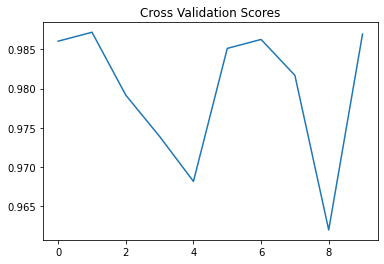

In [14]:
import matplotlib.pyplot as plt
sns.lineplot(np.arange(len(cv_scores)),cv_scores)
plt.gca().set_title('Cross Validation Scores')

In [15]:
predictions=model.predict(final_test)

In [16]:
sum([1 for i in predictions if i==1]), sum([1 for i in predictions if i==0])

(29, 30910)

Text(0.5, 1.0, 'Coupons Redeemed v/s Coupons not Redeemed: \n(0 - Coupon not redeemed, 1 - Coupon redeemed)')

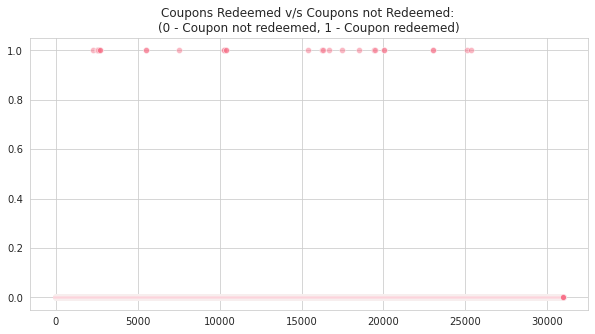

In [17]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.scatterplot(np.arange(len(predictions)),predictions,alpha=0.5)

plt.gca().set_title('Coupons Redeemed v/s Coupons not Redeemed: \n(0 - Coupon not redeemed, 1 - Coupon redeemed)')
